In [1]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
data = pd.read_csv('../data/tabular-playground/data.csv')
data.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      98000 non-null  int64  
 1   f_00    98000 non-null  float64
 2   f_01    98000 non-null  float64
 3   f_02    98000 non-null  float64
 4   f_03    98000 non-null  float64
 5   f_04    98000 non-null  float64
 6   f_05    98000 non-null  float64
 7   f_06    98000 non-null  float64
 8   f_07    98000 non-null  int64  
 9   f_08    98000 non-null  int64  
 10  f_09    98000 non-null  int64  
 11  f_10    98000 non-null  int64  
 12  f_11    98000 non-null  int64  
 13  f_12    98000 non-null  int64  
 14  f_13    98000 non-null  int64  
 15  f_14    98000 non-null  float64
 16  f_15    98000 non-null  float64
 17  f_16    98000 non-null  float64
 18  f_17    98000 non-null  float64
 19  f_18    98000 non-null  float64
 20  f_19    98000 non-null  float64
 21  f_20    98000 non-null  float64
 22

In [5]:
data_num = data.drop(['id', 'f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13'], axis=1)
data_cat = data[['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13']]

In [6]:
from sklearn.preprocessing import StandardScaler
X_cat = data_num.values
X_cat_standard = StandardScaler().fit_transform(X_cat)

In [7]:
X = np.concatenate((X_cat_standard, data_cat), axis=1)
X[:10]

array([[-3.89550500e-01, -9.17694946e-01,  6.49104995e-01,
         5.89498984e-01, -8.24774855e-01,  7.34848683e-01,
         2.26743219e+00, -4.73737567e-01,  3.60371972e-01,
         1.05923577e+00, -5.60604302e-01, -3.62971505e-01,
        -4.71839241e-01, -7.54256628e-01, -7.62195098e-01,
        -7.11585255e-01,  9.11572221e-01, -6.80948219e-01,
         7.62783050e-01,  9.60481581e-01,  1.04529612e+00,
         6.83322736e-01,  2.00000000e+00,  1.30000000e+01,
         1.40000000e+01,  5.00000000e+00,  1.30000000e+01,
         6.00000000e+00,  6.00000000e+00],
       [-6.88543799e-01, -4.59194764e-01,  6.54321217e-01,
         9.95533084e-01, -1.64447199e+00,  8.64966703e-01,
        -8.78352573e-02,  5.88248389e-01, -3.93846188e-01,
         1.39971938e-01, -3.24139220e-02,  4.78499187e-01,
        -4.22433626e-01, -8.91292064e-02, -1.78307297e+00,
        -5.41814989e-01,  4.54692971e-01,  1.03238624e+00,
        -1.33948161e-01, -5.52942135e-01,  3.55435202e-01,
        -1.60

In [9]:
Error =[]
for i in range(1, 10):
    kmeans = KMeans(init = "k-means++", n_clusters = i, n_init = 12)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)


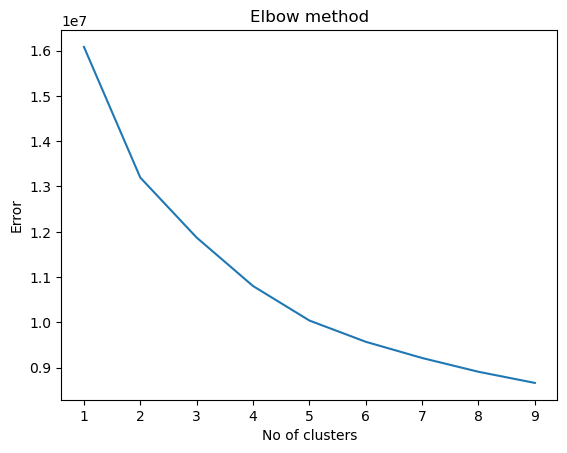

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(1, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [11]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[3 4 3 ... 2 0 3]


In [12]:
output = pd.DataFrame({'Id': data.id, 'Predicted': labels})
output.to_csv('submissions/clustering/submissionKNNsplitted.csv', index=False)   
print("Your submission was successfully saved!")

Your submission was successfully saved!


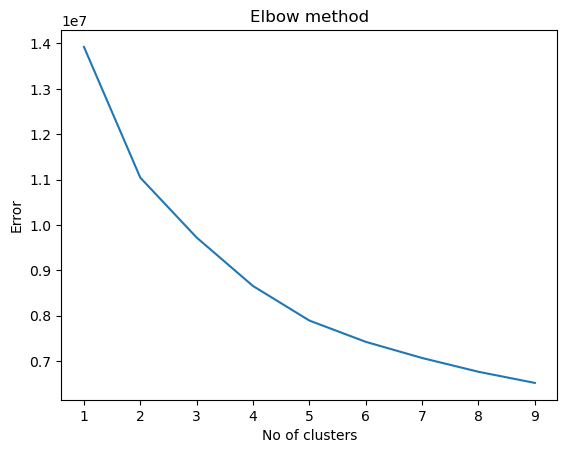

In [13]:
X_cat = data_cat.values

Error =[]
for i in range(1, 10):
    kmeans = KMeans(init = "k-means++", n_clusters = i, n_init = 12)
    kmeans.fit(X_cat)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [16]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X_cat)
labels = k_means.labels_
print(labels)

[3 3 3 ... 2 2 2]


In [17]:
output = pd.DataFrame({'Id': data.id, 'Predicted': labels})
output.to_csv('submissions/clustering/submissionKNNCatOnly.csv', index=False)   
print("Your submission was successfully saved!")

Your submission was successfully saved!
